In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user tensorflow


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import sklearn as sklearn
from sklearn.preprocessing import MinMaxScaler

In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
import torch
import torch.nn as nn

In [8]:
dat = pd.read_csv("C:/Users/Priyanka D/Desktop/Data science @Bharat Intern/Task1/GOOG.csv")

In [9]:
dat.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [10]:
closed_prices = dat["close"]

In [11]:
seq_len = 15

In [12]:
mn = MinMaxScaler()
scale_price = mn.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [13]:
X=[]
Y=[]

In [14]:
for i in range(len(scale_price) - seq_len):
    X.append(scale_price[i : i+ seq_len])
    Y.append(scale_price[i+seq_len])

In [15]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

In [16]:

train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [17]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [18]:
m = Model(1,64)

In [19]:
optim = torch.optim.Adam(m.parameters(), lr=0.001)

In [20]:
loss_fun = nn.MSELoss()

In [21]:
num_epochs=100

In [22]:
for epoch in range(num_epochs):
    op = m(train_x)
    loss=loss_fun(op,train_y)

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

10 epoch loss 0.012682287
20 epoch loss 0.011336127
30 epoch loss 0.008648237
40 epoch loss 0.007885422
50 epoch loss 0.007043164
60 epoch loss 0.0057083634
70 epoch loss 0.0035522238
80 epoch loss 0.0008566465
90 epoch loss 0.0008404888


In [23]:
m.eval()
with torch.no_grad():
    op=m(test_x)

In [24]:
prediction=mn.inverse_transform(op.numpy())
reality=mn.inverse_transform(test_y.numpy())

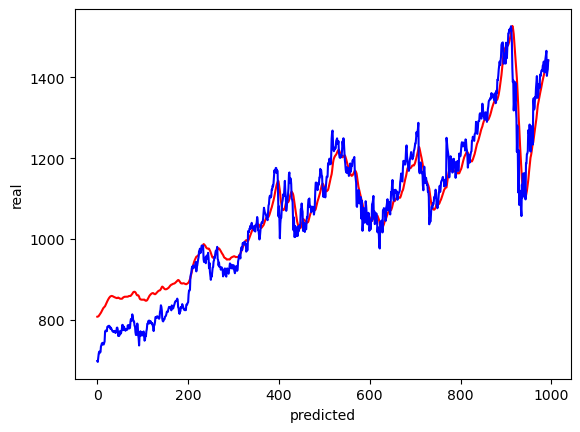

In [25]:
plt.plot(prediction.squeeze(),color="red",label="predicted")
plt.plot(reality.squeeze(),color="blue",label="real")
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()